# Analyzing scaling with mass 
October 13, 2021 
Venkitesh Ayyar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib widget

In [41]:
# Load data
fname='../results_mgrid.txt'
# a1=np.loadtxt(fname,delimiter='\t')
cols=['L','m','levels','n_per_level','conv_iters']
df1=pd.read_csv(fname,delimiter='\t',names=cols)
df1=df1.sort_values(by=['levels','n_per_level','L','m'])
df1

,L,m,levels,n_per_level,conv_iters
0,256,0.001,7,20,294
1,256,0.002,7,20,108
2,256,0.004,7,20,19
3,256,0.005,7,20,10
4,256,0.008,7,20,7
5,256,0.010,7,20,7
6,256,0.020,7,20,7
7,256,0.040,7,20,6
8,256,0.100,7,20,6
9,256,0.200,7,20,5


In [42]:
# Load data
fname='../results_gen_scaling.txt'
# a1=np.loadtxt(fname,delimiter='\t')
cols=['L','m','levels','n_per_level','conv_iters']
df2=pd.read_csv(fname,delimiter='\t',names=cols)
df2=df2.sort_values(by=['levels','n_per_level','L','m'])
df2

,L,m,levels,n_per_level,conv_iters
7,256,0.005,1,20,52604
6,256,0.008,1,20,21507
5,256,0.010,1,20,13984
4,256,0.020,1,20,3718
3,256,0.040,1,20,991
2,256,0.100,1,20,163
1,256,0.200,1,20,41
0,256,0.400,1,20,10


In [43]:
df2['conv_iters']=df2['conv_iters']/7.0
df2

,L,m,levels,n_per_level,conv_iters
7,256,0.005,1,20,7514.857143
6,256,0.008,1,20,3072.428571
5,256,0.010,1,20,1997.714286
4,256,0.020,1,20,531.142857
3,256,0.040,1,20,141.571429
2,256,0.100,1,20,23.285714
1,256,0.200,1,20,5.857143
0,256,0.400,1,20,1.428571


In [44]:
# df1.plot(kind='line',x='m',y='conv_iters',linestyle='',marker='o',logx=True,logy=True,xlabel='m',ylabel='Iters')


Text(0.5, 0.98, 'L=2048')

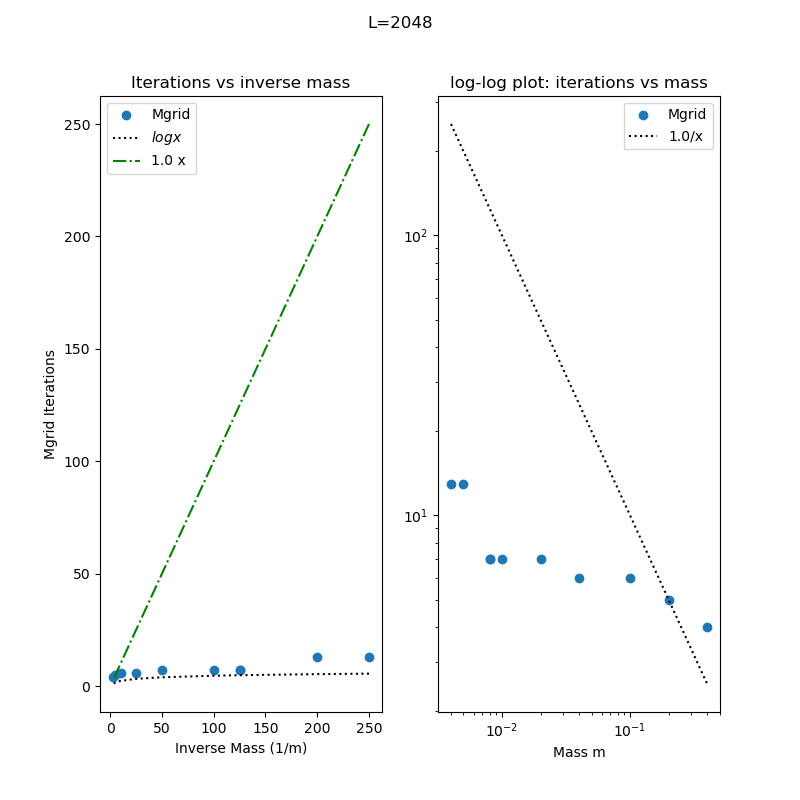

In [45]:
fig=plt.figure(figsize=(8,8))

## Fix L
L=2048
df=df1[df1.L==L][['m','conv_iters']]

## plot vs inverse mass 
fig.add_subplot(1,2,1)
x=1.0/df.m.values
y=df.conv_iters.values

y1=np.log(x)
y2=1.0*x 
plt.plot(x,y,marker='o',linestyle='',label='Mgrid')
plt.plot(x,y1,linestyle='dotted',color='k',label=r'$log x$')
plt.plot(x,y2,linestyle='-.',color='g',label='1.0 x')

plt.xlabel('Inverse Mass (1/m)')
plt.ylabel('Mgrid Iterations')
plt.legend()
plt.title('Iterations vs inverse mass')

## log log plot
fig.add_subplot(1,2,2)
x=df.m.values
y=df.conv_iters.values

y1=1.0/x
# y2=x**-3.0
# y3=0.005/ x**5
plt.plot(x,y,marker='o',linestyle='',label='Mgrid')
plt.plot(x,y1,linestyle='dotted',color='k',label='1.0/x')
# plt.plot(x,y2,linestyle='-.',color='g',label='1.0/x')
# plt.plot(x,y3,linestyle='--',color='b',label=r'1.75/x')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Mass m')
# plt.ylabel('Mgrid Iterations')
plt.legend()
plt.title('log-log plot: iterations vs mass')
plt.suptitle('L=%s'%(L))

In [46]:
dfb

,m,conv_iters
4,0.008,7
5,0.010,7
6,0.020,7
7,0.040,6
8,0.100,6
9,0.200,5
10,0.400,4


Text(0.5, 0.98, 'L=256')

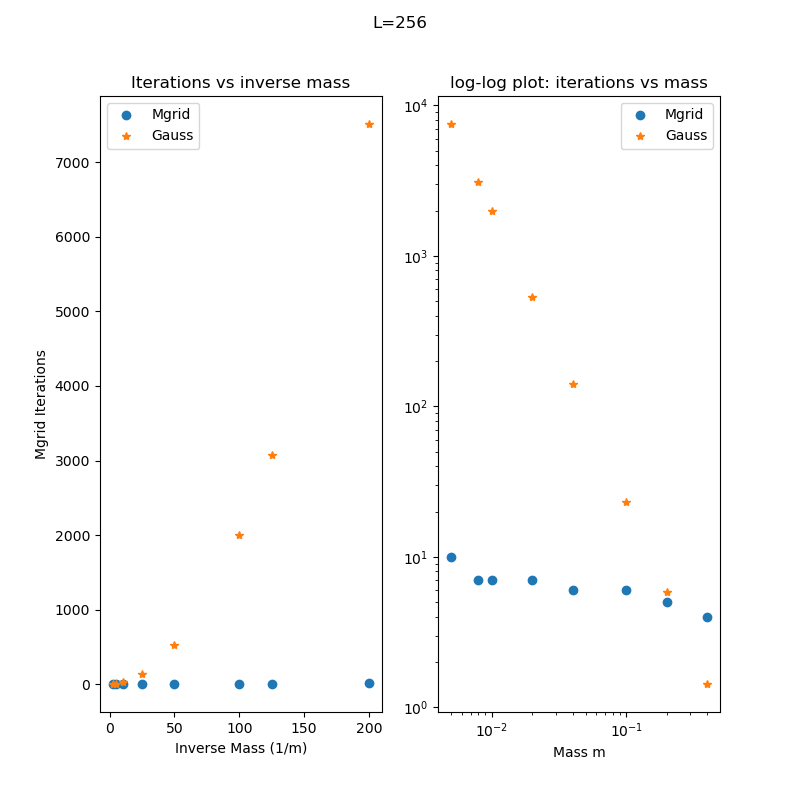

In [55]:
fig=plt.figure(figsize=(8,8))

## Fix L
L=256
dfa=df1[df1.L==L][['m','conv_iters']] # Mgrid
dfb=df2[df2.L==L][['m','conv_iters']] # Pure GS

m=dfb.m.values
dfa=dfa[dfa.m.isin(m)]

## plot vs inverse mass 
fig.add_subplot(1,2,1)

x1=1.0/dfa.m.values
y1=dfa.conv_iters.values
x2=1.0/dfb.m.values
y2=dfb.conv_iters.values
plt.plot(x1,y1,marker='o',linestyle='',label='Mgrid')
plt.plot(x2,y2,marker='*',linestyle='',label='Gauss')

plt.xlabel('Inverse Mass (1/m)')
plt.ylabel('Mgrid Iterations')
plt.legend()
plt.title('Iterations vs inverse mass')

## log log plot
fig.add_subplot(1,2,2)

x1=dfa.m.values
y1=dfa.conv_iters.values
x2=dfb.m.values
y2=dfb.conv_iters.values
plt.plot(x1,y1,marker='o',linestyle='',label='Mgrid')
plt.plot(x2,y2,marker='*',linestyle='',label='Gauss')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Mass m')
# plt.ylabel('Mgrid Iterations')
plt.legend()
plt.title('log-log plot: iterations vs mass')
plt.suptitle('L=%s'%(L))

In [52]:
dfa,dfb

(       m   conv_iters
 7  0.005  7514.857143
 6  0.008  3072.428571
 5  0.010  1997.714286
 4  0.020   531.142857
 3  0.040   141.571429
 2  0.100    23.285714
 1  0.200     5.857143
 0  0.400     1.428571,
         m  conv_iters
 3   0.005          10
 4   0.008           7
 5   0.010           7
 6   0.020           7
 7   0.040           6
 8   0.100           6
 9   0.200           5
 10  0.400           4)